### Sourajita Dewasi
### Enrollment ID: 191000050
### B. Tech CSE (6th Semester)
### Lab Project 1
### Predictive Analysis

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot as plt

In [ ]:
#reading dataset from Phishing website dataset 
df = pd.read_csv("dataset.csv")

Dataset of phishing websites: 


In [ ]:
df.head(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
#Target Variable
df['Result']

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [ ]:
df.shape

(11055, 32)

In [ ]:
#dropping NA values
df = df.dropna()
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [ ]:
#Selecting dependent and independent variables
X = df.iloc[:,:31]
y = df.iloc[:,31]
X.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
# Splitting dataset into 40% test size and 60% train size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
train_df = X_train
train_df['y'] = y_train
train_df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,y
7118,7119,-1,-1,1,1,1,1,1,1,1,...,1,1,-1,1,-1,-1,1,1,1,1
6384,6385,1,-1,1,1,1,-1,1,0,-1,...,1,1,-1,1,0,-1,1,0,1,-1
6455,6456,-1,-1,1,1,1,-1,0,-1,-1,...,1,1,-1,1,0,1,1,0,1,-1
5033,5034,1,-1,1,1,1,1,-1,1,-1,...,1,1,1,-1,1,1,1,1,1,1
3661,3662,1,-1,1,1,1,-1,1,1,1,...,1,1,1,-1,0,-1,1,1,1,1


In [ ]:
test_df = X_test
test_df['y'] = y_test
test_df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,y
10582,10583,-1,-1,1,1,1,-1,-1,0,-1,...,1,1,1,1,0,-1,1,1,1,-1
7533,7534,-1,-1,1,1,1,-1,0,-1,-1,...,1,1,-1,1,1,-1,1,-1,1,-1
10806,10807,-1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,0,1,-1,1,1,-1
2992,2993,1,-1,1,1,1,-1,0,1,-1,...,-1,-1,-1,-1,1,1,-1,1,-1,1
8940,8941,1,-1,1,1,1,-1,1,1,1,...,1,1,1,1,1,-1,-1,0,1,1


In [ ]:
# 5 randomly generated samples
sample_train1 = train_df.sample(frac =.70)
sample_train2 = train_df.sample(frac =.70)
sample_train3 = train_df.sample(frac =.70)
sample_train4 = train_df.sample(frac =.70)
sample_train5 = train_df.sample(frac =.70)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

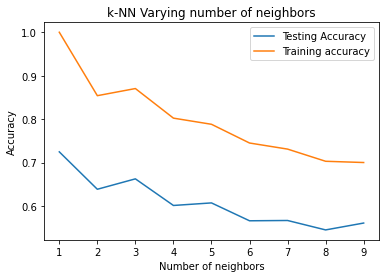

In [ ]:
import matplotlib.pyplot as plt

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Getting accuracy for entire dataset using Bagging methods
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors = 3), n_estimators = 5, max_samples=0.7)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_samples=0.7, n_estimators=5)

In [ ]:
#calculating accuracy 
bagging.score(X_test, y_test)

0.6085481682496607

In [ ]:
sample_train1.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,y
1831,1832,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,1,0,1,1
2257,2258,1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,0,-1,-1,0,1,-1
5832,5833,-1,-1,-1,-1,-1,-1,1,1,1,...,1,1,-1,-1,1,-1,-1,1,1,1
2850,2851,1,-1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,1,0,-1,1,1,-1,-1
4444,4445,1,-1,1,1,1,-1,1,1,-1,...,-1,-1,1,-1,1,1,-1,1,-1,1


In [ ]:
len(sample_train1.columns)

32

In [ ]:
sample_train1.iloc[:,0]

1831      1832
2257      2258
5832      5833
2850      2851
4444      4445
         ...  
7802      7803
10047    10048
6606      6607
954        955
6879      6880
Name: index, Length: 4643, dtype: int64

In [ ]:
#fitting randomly selected 70% sample dataset into knn1 model
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(sample_train1.iloc[:,:32], sample_train1.iloc[:,-1])
knn1.score(X_test, y_test)

0.6101311623699683

In [ ]:
#fitting randomly selected 70% sample dataset into knn2 model
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(sample_train1.iloc[:,:32], sample_train2.iloc[:,-1])
knn2.score(X_test, y_test)

0.5237449118046132

In [ ]:
#fitting randomly selected 70% sample dataset into knn3 model
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(sample_train1.iloc[:,:32], sample_train3.iloc[:,-1])
knn3.score(X_test, y_test)

0.5063319764812302

In [ ]:
#fitting randomly selected 70% sample dataset into knn4 model
knn4 = KNeighborsClassifier(n_neighbors = 3)
knn4.fit(sample_train1.iloc[:,:32], sample_train4.iloc[:,-1])
knn4.score(X_test, y_test)

0.5083672546359114

In [ ]:
#fitting randomly selected 70% sample dataset into knn5 model
knn5 = KNeighborsClassifier(n_neighbors = 3)
knn5.fit(sample_train5.iloc[:,:32], sample_train5.iloc[:,-1])
knn5.score(X_test, y_test)

0.6108095884215288

In [ ]:
#Getting accuracy for entire dataset using MaxVoting Ensemble Method (Hard Voting)
model = VotingClassifier(estimators=[('k1', knn1), ('k2', knn2), ('k3', knn3), ('k4', knn4), ('k5', knn5)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6623699683401176

In [ ]:
#Getting accuracy for entire dataset using MaxVoting Ensemble Method (Soft Voting)
model1 = VotingClassifier(estimators=[('k1', knn1), ('k2', knn2), ('k3', knn3), ('k4', knn4), ('k5', knn5)], voting='soft')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.6623699683401176